In [80]:
#1) Poisson Distribution:

#Avg Number of Events : 25
# Total num of events : 30

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

1-stats.poisson.cdf(25,30)

0.7916426353326671

In [2]:
stats.poisson.cdf(0.05,2)

0.1353352832366127

In [3]:
lambda_poisson = 25
prob_fraud = 0.05

lambda_fraud = lambda_poisson * prob_fraud
print(lambda_fraud)
prob_less_than_2_fraud = stats.poisson.cdf(1, lambda_fraud)
print(prob_less_than_2_fraud)

# Probability of having at least 2 fraudulent returns
prob_at_least_2_fraud = 1 - prob_less_than_2_fraud

print(prob_at_least_2_fraud)

1.25
0.6446357929354278
0.35536420706457217


In [4]:
# 2) Binomial Distribution :
#total number of events : 8
#total proba of success : 0.42
#expected succesful trials : 3

1 - stats.binom.cdf(2,8,0.42)

0.7249765375851261

In [5]:
stats.binom.pmf(4,8,0.42)

0.24649446736051217

In [6]:
#3) Exponential Distribution
#lambda = 85
stats.expon.cdf(85,
                    loc=1/85,
                   scale=85)



0.6320696377349755

In [7]:
1 - stats.expon.cdf(150,
               loc=1/85,
               scale=85)

0.17126084522766882

In [9]:
# 4) 1000 Farmers
#    10 Acres
#    38 lt presteside in week on an average = Mean
#    standard Deviation = 5 ltr

#  Z-Score ?

std = 5
mean = 38
X = 50

z_score = (X - mean) / std
print(z_score)

2.4


In [10]:
1 - stats.norm.cdf(z_score)
#The proportion of farmers spraying more than 50 liters of 
# pesticides in a week is approximately 0.00820.0082 or 0.82%0.82%. 
# This means that about 0.82% of the farmers are spraying more than 50 liters of pesticides per week.

0.008197535924596155

In [11]:
# Sample Mean = 10 
# 38 lt presteside in week on an average = Mean
# standard Deviation = 5 ltr
X2 = 10
z_score_2 = (X2-mean) / std
print(z_score_2)

-5.6


In [12]:
stats.norm.cdf(z_score_2)

1.0717590258310887e-08

The proportion of farmers spraying less than 10 liters of pesticides per week is approximately 1.07×10−81.07×10−8, or 0.00000107%. This is an extremely small proportion, indicating that almost no farmers spray such a small amount

In [14]:
lower_bound = 30
upper_bound = 60

upper = (upper_bound - mean) / std
print(upper)

4.4


In [15]:
lower = (lower_bound - mean) / std
print(lower)

-1.6


In [17]:
upper_z_score = stats.norm.cdf(upper)
print(upper_z_score)

0.9999945874560923


In [18]:
lower_z_score = stats.norm.cdf(lower)
print(lower_z_score)

0.054799291699557974


In [19]:
proportion = upper_z_score - lower_z_score

In [21]:
proportion

0.9451952957565343

In [37]:
import math
n = 60
sample_mean = 4998
population_std_dev = 1.30
hypothesized_mean = 5000
alpha = 0.05

z = (sample_mean - hypothesized_mean) / (population_std_dev / math.sqrt(n))


In [40]:
z

-11.91687183448436

In [42]:
1 - stats.norm.cdf(z)

1.0

In [50]:
# 6) Pop_mean = 18%
#    n = 100
#    sample_mean = 22

stats.ttest_1samp(100,22)

TtestResult(statistic=nan, pvalue=nan, df=0)

In [114]:
from scipy.stats import ttest_ind_from_stats

# Sample means and standard deviations
abc_mean = 450
competitor_mean = 368
abc_std = 78
competitor_std = 82

# Sample sizes
abc_n = 100
competitor_n = 100

# Calculate the test statistic
t_stat, p_val = ttest_ind_from_stats(abc_mean, abc_std / (abc_n ** 0.5), abc_n, competitor_mean, competitor_std / (competitor_n ** 0.5), competitor_n)

print(t_stat,p_val)
# Determine the critical region
critical_region = t_stat > 2.093

# Print the result
if critical_region:
    print("Reject the null hypothesis. The difference in means is statistically significant.")
else:
    print("Fail to reject the null hypothesis. The difference in means is not statistically significant.")


72.45580616896933 1.7564257410365037e-144
Reject the null hypothesis. The difference in means is statistically significant.


In [115]:
# 8)

training_df = pd.read_csv("trainingscores.csv")

In [116]:
training_df

,Student,Score Before Training,Score After Training
0,1,30,77
1,2,57,79
2,3,97,46
3,4,94,44
4,5,WC,89
5,6,26,84
6,7,39,89
7,8,32,84
8,9,41,74
9,10,45,81


In [117]:
print(training_df.dtypes)

Student                   int64
Score Before Training    object
Score After Training      int64
dtype: object


In [125]:
training_df.rename(columns={'Score Before Training':'before_training','Score After Training':'after_training'},inplace=True)

In [155]:
print(training_df.dtypes)

Student            int64
before_training    Int64
after_training     int64
dtype: object


In [127]:
training_df[0:5]

,Student,before_training,after_training
0,1,30,77
1,2,57,79
2,3,97,46
3,4,94,44
4,5,WC,89


In [141]:
import numpy as np
training_df.loc[training_df['before_training'] == np.nan,'before_training'] = 0

In [154]:
training_df

,Student,before_training,after_training
0,1,30,77
1,2,57,79
2,3,97,46
3,4,94,44
4,5,<NA>,89
5,6,26,84
6,7,39,89
7,8,32,84
8,9,41,74
9,10,45,81


In [157]:
training_df['before_training'] = pd.to_numeric(training_df['before_training'], errors='coerce').astype('int64')

ValueError: cannot convert NA to integer

/tmp/ipykernel_4065/3163656036.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(training_df['before_training'],label="Before")


ValueError: cannot convert to 'float64'-dtype NumPy array with missing values. Specify an appropriate 'na_value' for this dtype.

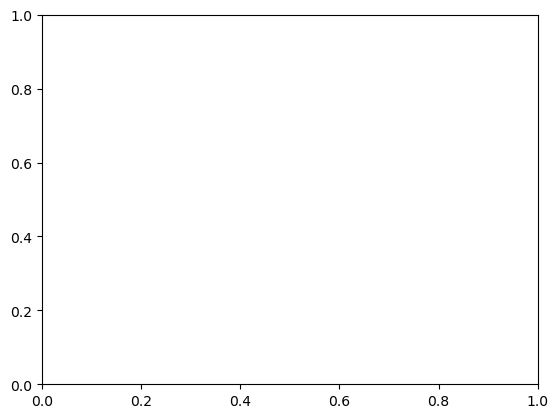

In [156]:
sn.distplot(training_df['before_training'],label="Before")
sn.distplot(training_df['after_training'], label='After')
plt.legend();

In [149]:
stats.ttest_rel(training_df['before_training'], training_df['after_training'])

TtestResult(statistic=nan, pvalue=nan, df=nan)

In [151]:
from scipy.stats import f_oneway
f_oneway(training_df['before_training'],
        training_df['after_training'])

F_onewayResult(statistic=nan, pvalue=nan)